In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# 해당 함수들은 모두 2버전을 기반으로 작성되었다.
tf.__version__

'2.1.0'

텐서플로우의 특징
- 넘파이와 비슷하면서 GPU 지원
- 분산 컴퓨팅을 지원
- JIT(just-in-time) 컴파일러를 포함. 속도를 높이고 메모리 사용량을 줄이기 위해 계산을 최적화한다.<br>
    파이썬에서 계산 그래프를 추출한 뒤 최적화하고 효율적으로 실행
- 계산 그래프는 플랫폼에 중립적인 포맷으로 내보낼 수 있다. 다른 환경에서 다른 환경으로 보내는 것이 가능<br>
    예) 리눅스의 파이썬 -> 안드로이드 장치의 자바
- 자동미분, 고성능 옵티마이저 등을 제공해 손실 함수를 쉽게 최소화할 수 있다.

많은 연산은 커널(kernel)이라 부르는 여러 구현을 가지는데 각 커널은 CPU, GPU, TPU(텐서 처리 장치)와 같은 특정 장치에 맞게 만들어졌다. GPU는 계산을 작은 단위로 나누어 여러 GPU 스레드에서 병렬로 실행하므로 속도가 매우 빠르다. TPU는 딥러닝 연산을 위해 특별히 설계된 ASIC 칩이다.

# 넘파이와 유사

In [7]:
# 텐서 연산
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [8]:
temp_tensor = tf.constant([[1.,2.,3.],[4.,5.,6.]])
temp_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [9]:
print(temp_tensor.shape)
print(temp_tensor.dtype)

(2, 3)
<dtype: 'float32'>


In [10]:
# 인덱싱도 유사
temp_tensor[:,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [15]:
temp_tensor[:,1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [11]:
temp_tensor[...,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

실수와의 사칙연산, tf.square(tensor), tensor1 @ tf.transpose(tensor2) 등이 가능 (@는 행렬 곱셈=tf.matmul)<br>
넘파이에서 볼 수 있는 대부분의 연산을 제공

이름이 약간 다른 함수도 있음. tf.reduce_mean 와 np.mean / tf.reduce_sum 와 np.sum / tf.reduce_max 와 np.max / tf.math.log 와 np.log

In [16]:
# 쉽게 변환
a = np.array([2.,4.,5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [18]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [17]:
temp_tensor.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [20]:
# 타입 변환, 32비트, 64비트, 실수, 정수 등 다른 타입은 연산이 안됨. 필요할 경우 cast함수 사용
tf.cast(tf.constant([42,36]),tf.float32)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([42., 36.], dtype=float32)>

In [25]:
# 변수 :  tf.Tensor는 변경이 불가능하지만 다음과 같이 tf.Variable로 정의하면 역전파에 의해 변경이 가능하다.
v = tf.Variable(tf.random.normal(shape=(2,2)))
v

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1.0522785 , 0.26026496],
       [0.53359574, 0.38319394]], dtype=float32)>

In [26]:
# assign() 메서드로 변수값 변경 가능
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[2.104557 , 0.5205299],
       [1.0671915, 0.7663879]], dtype=float32)>

In [28]:
print(v[0,1].assign(42))  # 특정 원소만 값 변경
print(v[:,1].assign([0.,1.]))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 2.104557 , 42.       ],
       [ 1.0671915,  0.7663879]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[2.104557 , 0.       ],
       [1.0671915, 1.       ]], dtype=float32)>


In [31]:
v.scatter_nd_update(indices=[[0,0],[1,1]],updates=[100,200.])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[100.       ,   0.       ],
       [  1.0671915, 200.       ]], dtype=float32)>

다른 데이터 구조
- sparse tensor (tf.SparseTensor)
- tensor array (tf.TensorArray) : 텐서의 리스트
- ragged tensor(tf.RaggedTensor) : 리스트의 리스트
- string tensor : 문자열 텐서
- 집합
- 큐 : FIFO Queue, PriorityQueue, RandomShuffleQueue, PaddingQueue 등 (tf.queue 패키지)

# 텐서플로우로 사용자 정의 모델과 훈련 알고리즘을 만드는 것은 일단 생략

# 텐서플로우 함수와 그래프
1버전에 비해 사용하기가 매우 편해졌다.<br>
tf.function(*일반 함수)와 같은 방식으로 사용할 수 있으나 다음과 같이 사용하는 것도 가능하다.

In [34]:
@tf.function
def tf_cube(x):
    return x**3
# 그래프가 생성됨
tf_cube(3)

<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [35]:
# 원본 파이썬 함수가 필요할 때
tf_cube.python_function(2)

8

케라스를 사용하면 파이썬 함수를 자동으로 텐서플로우 함수로 바꿔준다. 그렇게 못하게 하려면 사용자 정의 층이나 모델 생성시 dynamic=True로 지정하거나 compile() 메서드에 run_eagerly=True로 지정하면 된다.

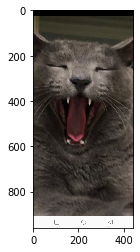

In [4]:
from PIL import Image
cat = np.array(Image.open('고양이.jpg'))
plt.imshow(cat)

In [5]:
cat.shape

(960, 443, 3)

(400, 400, 3)


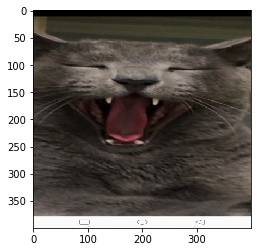

In [8]:
cat_scale = cat/255
cat_resize = tf.image.resize(cat_scale,[400,400])
print(cat_resize.shape)
plt.imshow(cat_resize)
